In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
stock_train = pd.read_csv(r"/Users/mdfarazali/Documents/AI ML/Projects/Stock_price_prediction/Google_Stock_Price_Train.csv")

In [65]:
stock_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [66]:
#training_set = stock_train.iloc[:,1:2].values # : Defines All The Number Of Rows 1:2 Defines Take The COlumn On Index No. One
training_set = stock_train.iloc[:, 1:2].values

In [80]:
from sklearn.preprocessing import MinMaxScaler
#mms = MinMaxScaler(feature_range=(0,1))
mms = MinMaxScaler(feature_range=(0, 1))
scaled_training_set = mms.fit_transform(training_set)

In [81]:
#scaled_training_set = mms.fit_transform(training_set)

In [90]:
#x_t = []
#y_t = []
x_t, y_t = [], []

In [83]:
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [84]:
# for i in range(60,1258):
#     x_t.append(scaled_training_set[i-60:i,0])
#     y_t.append(scaled_training_set[i,0])
for i in range(60, len(scaled_training_set)):
    x_t.append(scaled_training_set[i - 60:i, 0])
    y_t.append(scaled_training_set[i, 0])

In [88]:
print(x_t[1:2],"x")

[array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
       0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
       0.07474514, 0.02797827, 0.02379269, 0.02409033, 0.0159238 ,
       0.01078949, 0.00967334, 0.01642607, 0.02100231, 0.02280676,
       0.02273235, 0.02810849, 0.03212665, 0.0433812 , 0.04475779,
       0.04790163, 0.0440695 , 0.04648783, 0.04745517, 0.04873875,
       0.03936305, 0.04137213, 0.04034898, 0.04784582, 0.04325099,
       0.04356723, 0.04286033, 0.04602277, 0.05398467, 0.05738894,
       0.05714711, 0.05569611, 0.04421832, 0.04514845, 0.04605997,
       0.04412531, 0.03675869, 0.04486941, 0.05065481, 0.05214302,
       0.05612397, 0.05818885, 0.06540665, 0.06882953, 0.07243843,
       0.07993526, 0.07846566, 0.08034452, 0.08497656, 0.08627874])] x


In [86]:
print(y_t[0:1],"y")

[0.08627874097775134] y


In [10]:
x_t_test= []
y_t_test = []

In [11]:
for i in range(60,1258):
    x_t_test.append(scaled_training_set[i-60:i,0])
    y_t_test.append(scaled_training_set[i,0])

In [12]:
print(y_t_test[0])

0.08627874097775134


In [13]:
print(y_t_test[1])

0.08471612471166012


In [14]:
type(x_t)

list

In [15]:
x_t, y_t = np.array(x_t),np.array(y_t)

In [16]:
type(x_t)

numpy.ndarray

In [17]:
x_t.shape

(1198, 60)

In [18]:
x_t = np.reshape(x_t.shape[0],x_t.shape[1],1)

TypeError: order must be str, not int

In [19]:
x_t = np.reshape(x_t, (x_t.shape[0], x_t.shape[1], 1))

In [20]:
x_t.shape

(1198, 60, 1)

In [21]:
x_t.ndim

3

## Now DL model

In [22]:
import tensorflow

from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential

stock_model = Sequential()

2024-11-23 11:13:34.551842: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### imput layer

In [23]:
stock_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_t.shape[1],1)))

stock_model.add(Dropout(0.2))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Hidden layers

In [24]:
stock_model.add(LSTM(units=60, return_sequences=True, input_shape=(x_t.shape[1],1)))
stock_model.add(Dropout(0.2))

stock_model.add(LSTM(units=70, return_sequences=True, input_shape=(x_t.shape[1],1)))
stock_model.add(Dropout(0.2))

stock_model.add(LSTM(units=80, return_sequences=True, input_shape=(x_t.shape[1],1)))
stock_model.add(Dropout(0.2))

### Output layer

In [25]:
stock_model.add(Dense(units=1),)

In [26]:
stock_model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
stock_model.fit(x_t, y_t, epochs=300, batch_size=32)

Epoch 1/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - loss: 0.1463
Epoch 2/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0869
Epoch 3/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0832
Epoch 4/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.0768
Epoch 5/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0803
Epoch 6/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0778
Epoch 7/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0773
Epoch 8/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0805
Epoch 9/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0756
Epoch 10/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0747
Epoch 11/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.0789
Epoch 12/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0763
Epoch 13/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0781
Epoch 14/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.0735
Epoch 15/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s

# Testing dataset

In [28]:
stock_test = pd.read_csv(r"/Users/mdfarazali/Documents/AI ML/Projects/Stock_price_prediction/Google_Stock_Price_Test.csv")

In [29]:
real_stock_price = stock_test.iloc[:,1:2].values

In [33]:
stock_total = pd.concat((stock_train['Open'],stock_test['Open']),axis=0) # Check the exact column names and use the correct case

In [34]:
inputs = stock_total[len(stock_total)-len(stock_test)-60:].values

In [35]:
inputs.shape

(80,)

In [36]:
inputs = inputs.reshape(-1,1)

In [37]:
inputs.shape

(80, 1)

In [40]:
inputs = mms.transform(inputs)

In [41]:
x_test = []

In [42]:
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])

In [43]:
type(x_test)

list

In [44]:
x_test = np.array(x_test)

In [45]:
x_test.shape

(20, 60)

In [47]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [48]:
x_test.shape

(20, 60, 1)

In [49]:
x_test.ndim

3

In [50]:
pred = stock_model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step


In [51]:
pred[1]

array([[0.50392854],
       [0.49513626],
       [0.4911489 ],
       [0.4846989 ],
       [0.48167667],
       [0.48124343],
       [0.4821543 ],
       [0.48322818],
       [0.48384288],
       [0.4838484 ],
       [0.48335698],
       [0.48256895],
       [0.48167437],
       [0.4808132 ],
       [0.48006934],
       [0.4794796 ],
       [0.47904614],
       [0.4787503 ],
       [0.47856444],
       [0.47845924],
       [0.4784083 ],
       [0.4783917 ],
       [0.4783945 ],
       [0.47840613],
       [0.47842032],
       [0.478433  ],
       [0.47844294],
       [0.47845024],
       [0.47845563],
       [0.4784599 ],
       [0.4784633 ],
       [0.47846556],
       [0.478467  ],
       [0.4784678 ],
       [0.47846794],
       [0.47846767],
       [0.47846743],
       [0.4784673 ],
       [0.47846687],
       [0.478466  ],
       [0.47846532],
       [0.47846517],
       [0.4784652 ],
       [0.47846547],
       [0.47846594],
       [0.47846645],
       [0.47846696],
       [0.478

In [52]:
pred = mms.inverse_transform(pred)

ValueError: Found array with dim 3. None expected <= 2.

In [53]:
pred = mms.inverse_transform(pred.reshape(-1, 1))

In [54]:
pred[1]

array([545.28546], dtype=float32)

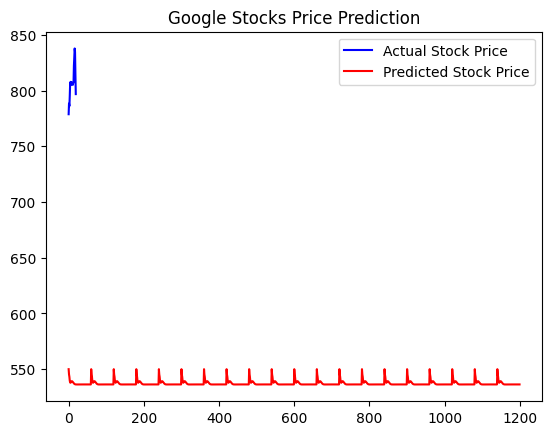

In [57]:
import matplotlib.pyplot as plt

plt.plot(real_stock_price, color='blue', label="Actual Stock Price")
plt.plot(pred, color='red', label= "Predicted Stock Price")
plt.title('Google Stocks Price Prediction')
plt.legend()
plt.show()

In [62]:
import math
from sklearn.metrics import r2score, mean_squared_error

rrr = math.sqrt(mean_squared_error[real_stock_price,pred])

r2score = (r2_score(real_stock_price,pred))

print(rrr, "rrr", "1", r2score)

ImportError: cannot import name 'r2score' from 'sklearn.metrics' (/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/__init__.py)

In [63]:
import math
from sklearn.metrics import r2_score, mean_squared_error

# Calculate Root Mean Squared Error (RMSE)
rrr = math.sqrt(mean_squared_error(real_stock_price, pred))

# Calculate R-squared score
r2score = r2_score(real_stock_price, pred)

# Print results with proper formatting
print(f"RMSE: {rrr}, R2 Score: {r2score}")


ValueError: Found input variables with inconsistent numbers of samples: [20, 1200]

In [58]:
stock_model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [59]:
stock_model.metrics

[<Mean name=loss>]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - loss: 0.0872
Epoch 2/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.0053
Epoch 3/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0049
Epoch 4/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0045
Epoch 5/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 196ms/step - loss: 0.0052
Epoch 6/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - loss: 0.0062
Epoch 7/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - loss: 0.0037
Epoch 8/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.0036
Epoch 9/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0041
Epoch 10/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0042
Epoch 11/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.0035
Epoch 12/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - loss: 0.0034
Epoch 13/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 0.0032
Epoch 14/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step - loss: 0.0030
Epoch 15/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s

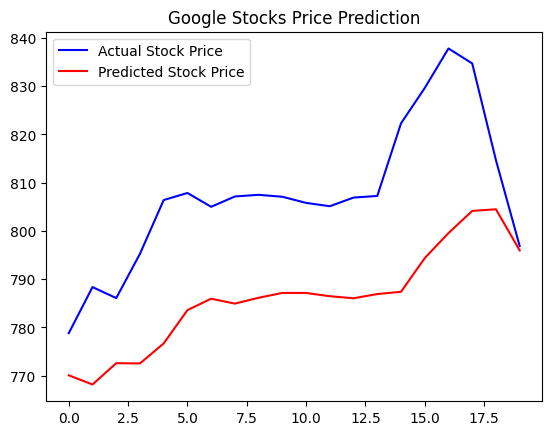

RMSE: 23.315669844543958, R2 Score: -1.50124839298666


In [89]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score, mean_squared_error
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

# Load the training dataset
stock_train = pd.read_csv(r"/Users/mdfarazali/Documents/AI ML/Projects/Stock_price_prediction/Google_Stock_Price_Train.csv")
training_set = stock_train.iloc[:, 1:2].values

# Scale the dataset
mms = MinMaxScaler(feature_range=(0, 1))
scaled_training_set = mms.fit_transform(training_set)

# Prepare the training data
x_t, y_t = [], []
for i in range(60, len(scaled_training_set)):
    x_t.append(scaled_training_set[i - 60:i, 0])
    y_t.append(scaled_training_set[i, 0])

x_t, y_t = np.array(x_t), np.array(y_t)
x_t = np.reshape(x_t, (x_t.shape[0], x_t.shape[1], 1))  # Reshape for LSTM

# Build the LSTM model
stock_model = Sequential()

# Adding LSTM layers with Dropout
stock_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_t.shape[1], 1)))
stock_model.add(Dropout(0.2))

stock_model.add(LSTM(units=60, return_sequences=True))
stock_model.add(Dropout(0.2))

stock_model.add(LSTM(units=70, return_sequences=True))
stock_model.add(Dropout(0.2))

stock_model.add(LSTM(units=80))
stock_model.add(Dropout(0.2))

# Adding the output layer
stock_model.add(Dense(units=1))

# Compile the model
stock_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
stock_model.fit(x_t, y_t, epochs=300, batch_size=32)

# Load the test dataset
stock_test = pd.read_csv(r"/Users/mdfarazali/Documents/AI ML/Projects/Stock_price_prediction/Google_Stock_Price_Test.csv")
real_stock_price = stock_test.iloc[:, 1:2].values

# Prepare test inputs
stock_total = pd.concat((stock_train['Open'], stock_test['Open']), axis=0)  # Fix column name case
inputs = stock_total[len(stock_total) - len(stock_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = mms.transform(inputs)

# Prepare x_test
x_test = []  # Initialize x_test
for i in range(60, len(inputs)):
    x_test.append(inputs[i - 60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predict the stock prices
pred = stock_model.predict(x_test)
pred = mms.inverse_transform(pred.reshape(-1, 1))

# Plot the results
plt.plot(real_stock_price, color='blue', label="Actual Stock Price")
plt.plot(pred, color='red', label="Predicted Stock Price")
plt.title('Google Stocks Price Prediction')
plt.legend()
plt.show()

# Evaluate the model
rrr = math.sqrt(mean_squared_error(real_stock_price, pred))  # Fix mean_squared_error syntax
r2score = r2_score(real_stock_price, pred)  # Correct r2_score usage

# Print evaluation metrics
print(f"RMSE: {rrr}, R2 Score: {r2score}")


In [92]:
import joblib

joblib.dump(mms,'mms.h5')

['mms.h5']

In [93]:
stock_model.save('stock_model.h5')  # Save the trained Keras model